In [3]:
import pandas as pd
import jieba
import chardet

In [4]:
!pwd

/Users/shlin/wspace/github/AI-For-NLP/lecture-2/online


In [5]:
database = "/Users/shlin/wspace/github/AI-For-NLP/lecture-2/online/datasource/sqlResult_1558435.csv"

In [160]:
dataframe = pd.read_csv(database, encoding='gb18030')
all_contents = dataframe['content'].tolist()
all_contents[:5]

['此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/体验版内测，稳定版暂不受影响），以确保工程师可以集中全部精力进行系统优化工作。有人猜测这也是将精力主要用到MIUI 9的研发之中。\r\nMIUI 8去年5月发布，距今已有一年有余，也是时候更新换代了。\r\n当然，关于MIUI 9的确切信息，我们还是等待官方消息。\r\n',
 '骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考虑性能而去屏蔽掉小核心。相反，他们正联手微软，找到一种适合桌面平台的、兼顾性能和功耗的完美方案。\r\n报道称，微软已经拿到了一些新的源码，以便Windows 10更好地理解big.little架构。\r\n资料显示，骁龙835作为一款集成了CPU、GPU、基带、蓝牙/Wi-Fi的SoC，比传统的Wintel方案可以节省至少30%的PCB空间。\r\n按计划，今年Q4，华硕、惠普、联想将首发骁龙835 Win10电脑，预计均是二合一形态的产品。\r\n当然，高通骁龙只是个开始，未来也许还能见到三星Exynos、联发科、华为麒麟、小米澎湃等进入Windows 10桌面平台。\r\n',
 '此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n至于电池缩水，可能与刘作虎所说，一加手机5要做市面最轻薄大屏旗舰的设定有关。\r\n按照目前掌握的资料，一加手机5拥有5.5寸1080P三星AMOLED显示屏、6G/8GB RAM，64GB/128GB ROM，双1600万摄像头，备货量“惊喜”。\r\n根据京东泄露的信息，一加5起售价是xx99元，应该是在2799/2899/2999中的某个。\r\n',
 '这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n',
 '（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清晨交警发现有一女子赤裸上身，行走在南坪快速上，期间还起了轻生年头，一辅警发现后赶紧为其披上黄衣，并一路劝说她。\r\n那么事发时\r\n到底都发生了些什么呢？\r\n南都记者带您一起还原现场\r\n南都记者在龙岗大队坂田中队见到了辅警刘青（发现女生的辅警），一位外表高大帅气，说

In [161]:
import re
test_string = "此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/体验版内测，稳定版暂不受影响），以确保工程师可以集中全部精力进行系统优化工作。有人猜测这也是将精力主要用到MIUI 9的研发之中。\r\nMIUI 8去年5月发布，距今已有一年有余，也是时候更新换代了。\r\n当然，关于MIUI 9的确切信息，我们还是等待官方消息。\r\n'"
def remove_extra_char(string):
    pattern = re.compile('[\w|\d]+') 
    string = pattern.findall(str(string))
    return ' '.join(s for s in string)

remove_extra_char(test_string)

'此外 自本周 6月12日 起 除小米手机6等15款机型外 其余机型已暂停更新发布 含开发版 体验版内测 稳定版暂不受影响 以确保工程师可以集中全部精力进行系统优化工作 有人猜测这也是将精力主要用到MIUI 9的研发之中 MIUI 8去年5月发布 距今已有一年有余 也是时候更新换代了 当然 关于MIUI 9的确切信息 我们还是等待官方消息'

In [162]:
text = [remove_extra_char(t) for t in all_contents]
text[:2]
TEXT = ''.join(t for t in text )

In [163]:
def cut(string):return list(jieba.cut(string))

In [164]:
#ALL_TOKEN = [cut(t) for t in TEXT]
ALL_TOKEN = cut(TEXT)
ALL_TOKEN[:10]

['此外', ' ', '自', '本周', ' ', '6', '月', '12', '日', ' ']

In [68]:
len(TEXT)

37412506

In [165]:
valid_tokens = [t for t in ALL_TOKEN if t.strip() and t != 'n']
valid_tokens[:10]

['此外', '自', '本周', '6', '月', '12', '日', '起', '除', '小米']

In [70]:
from collections import Counter

In [166]:
words_count = Counter(valid_tokens)
words_count.most_common(10)

[('的', 703820),
 ('在', 264633),
 ('月', 189525),
 ('日', 169920),
 ('新华社', 142462),
 ('和', 134220),
 ('年', 123531),
 ('了', 121904),
 ('是', 100288),
 ('１', 88187)]

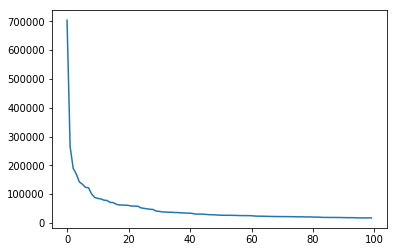

In [167]:
import matplotlib.pyplot as plt
%matplotlib inline


freq = [f for w, f in words_count.most_common(100)]
x = [i for i in range(len(freq[:100]))]
plt.plot(x, freq)

In [169]:
sum_count = len(valid_tokens)
sum_count

17221785

## one gram

In [170]:
def one_gram_prob(sentence):
    prob = 1
    word = cut(sentence)
    for w in word:
        if words_count[w]:
            prob *= words_count[w] / sum_count
        else:
            prob *= 1 / sum_count
    return prob
    
one_gram_prob("你好这是一个测试")

3.474921297573793e-16

## two gram

In [171]:
_2_gram_tokens = [''.join(tokens[i:i + 2]) for i in range(len(tokens[:-2]))]
_2_gram_tokens[:10]

['此外自', '自本周', '本周6', '6月', '月12', '12日', '日起', '起除', '除小米', '小米手机']

In [172]:
len(two_gram_tokens)

17221783

In [173]:
_2_gram_word_count = Counter(_2_gram_tokens)
_2_gram_word_count.most_common(10)

[('2017年', 62341),
 ('外代二线', 61385),
 ('新华社照片', 50401),
 ('5月', 39814),
 ('4月', 36149),
 ('新华社记者', 30864),
 ('日在', 27207),
 ('２０', 27166),
 ('年5', 25438),
 ('年4', 23733)]

In [174]:
_2_gram_sum_count = len(_2_gram_tokens)
_2_gram_sum_count

17221783

In [175]:
def get_two_gram_prob(w1, w2):
    #print(two_word)
    if two_word_count[w1 + w2]:
        return (two_word_count[w1 + w2] / two_word_sum_count)
    else:
        return 1 / two_word_sum_count
    return prob
get_two_gram_prob("去", "北京")

1.8000459069772276e-06

In [177]:

def two_gram_prob(sentence):
    prob = 1
    word = cut(sentence)
    #print(word)
    for i in range(len(word) - 1):
        prob *= get_two_gram_prob(word[i], word[i + 1]) / one_gram_prob(word[i])
    return prob
#two_word_prob("去北京")
two_word_prob("你好这是一个测试")

4.957626688893839e-08

In [178]:
grammar = """
sentence => noun_phrase verb_phrase 
noun_phrase => Article Adj* noun belong 
belong => de property
de => 的
property => 眼睛 | 裙子 | 胳膊 | 尾巴
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>   蓝色的 |  好看的 | 小小的
"""

In [180]:
import random
def parse_grammar(grammar_str, sep='=>'):
    grammar = {}
    for line in grammar_str.split('\n'): 
        line = line.strip()
        if not line: continue
        
        target, rules = line.split(sep)
        
        grammar[target.strip()] = [r.split() for r in rules.split('|')]
    
    return grammar


def gene(grammar_parsed, target='sentence'):
    if target not in grammar_parsed: return target
    
    rule = random.choice(grammar_parsed[target])
    return ''.join(gene(grammar_parsed, target=r) for r in rule if r!='null')

In [203]:
g = parse_grammar(grammar)
random_generated = [gene(g) for _ in range(100)]

In [204]:
sorted(random_generated, key=two_gram_prob, reverse=True)

['一个女人的眼睛看见一个女人的尾巴',
 '一个桌子的胳膊看着这个女人的胳膊',
 '这个桌子的眼睛看见这个桌子的眼睛',
 '这个女人的裙子看着一个女人的裙子',
 '一个女人的尾巴看见这个小猫的裙子',
 '一个篮球的眼睛看见一个女人的胳膊',
 '这个女人的裙子坐在一个桌子的裙子',
 '一个桌子的尾巴看着这个篮球的眼睛',
 '这个篮球的眼睛坐在一个女人的尾巴',
 '这个桌子的眼睛看见一个篮球的眼睛',
 '这个篮球的眼睛看见一个桌子的眼睛',
 '这个小猫的裙子看见一个桌子的胳膊',
 '一个桌子的裙子坐在这个桌子的眼睛',
 '一个篮球的尾巴看见一个女人的尾巴',
 '一个桌子的眼睛看见一个篮球的眼睛',
 '一个篮球的尾巴看着这个篮球的眼睛',
 '这个小猫的尾巴看见这个篮球的胳膊',
 '一个女人的尾巴看见这个小小的小猫的裙子',
 '一个小猫的胳膊坐在这个女人的尾巴',
 '这个篮球的裙子看着这个小猫的尾巴',
 '一个小猫的眼睛看见这个桌子的裙子',
 '这个桌子的尾巴看见这个篮球的裙子',
 '一个小小的女人的尾巴看着这个小猫的裙子',
 '一个小小的女人的眼睛看见一个小猫的胳膊',
 '一个桌子的尾巴坐在这个篮球的眼睛',
 '这个篮球的尾巴看见这个篮球的胳膊',
 '一个小猫的胳膊坐在一个小猫的裙子',
 '一个女人的胳膊听着这个篮球的尾巴',
 '这个桌子的尾巴听着这个篮球的眼睛',
 '一个小猫的胳膊听着这个女人的裙子',
 '这个篮球的眼睛坐在这个篮球的胳膊',
 '一个小小的篮球的裙子坐在这个女人的尾巴',
 '这个桌子的裙子坐在一个小小的篮球的裙子',
 '一个小猫的裙子看着这个小小的篮球的裙子',
 '一个篮球的尾巴看着一个桌子的尾巴',
 '这个小小的小小的女人的裙子看着这个桌子的尾巴',
 '这个小小的桌子的眼睛听着这个桌子的胳膊',
 '这个篮球的裙子听着一个篮球的尾巴',
 '这个好看的桌子的尾巴看见一个女人的眼睛',
 '这个桌子的胳膊看见一个好看的女人的胳膊',
 '一个女人的裙子看见一个好看的篮球的胳膊',
 '这个小猫的胳膊看见一个好看的小猫的眼睛',
 '这个女人的眼睛看着一个蓝色的小猫的眼睛',
 '这个小小的小小的小猫的裙子坐在这个篮球的裙子',
 '一个女人的眼睛坐在一个蓝色的桌子的裙子',
 '一个